In [1]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Conv1D, Flatten, MaxPooling1D, AveragePooling1D, Concatenate, LeakyReLU
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [2]:
df = pickle.load(open('dataset_vBalanced.pkl', 'rb'))
df.head()

,Target_Vec_0,Target_Vec_1,Target_Vec_2,Target_Vec_3,Target_Vec_4,Target_Vec_5,Target_Vec_6,Target_Vec_7,Target_Vec_8,Target_Vec_9,...,Drug_Vec_91,Drug_Vec_92,Drug_Vec_93,Drug_Vec_94,Drug_Vec_95,Drug_Vec_96,Drug_Vec_97,Drug_Vec_98,Drug_Vec_99,Class
0,0.001179,-0.000599,0.000487,-0.000306,0.000802,-0.000354,0.001005,-0.000329,-0.000619,-0.000425,...,-0.027773,-0.261224,-0.349108,0.229779,0.161475,0.124695,0.368989,-0.198983,-0.435481,1
1,-0.000027,-0.001464,-0.000131,0.000246,0.000441,-0.000762,0.000180,-0.000694,-0.000680,-0.000532,...,-0.009263,-0.166779,-0.276308,0.178456,0.128912,0.083457,0.357332,-0.184330,-0.500235,1
2,-0.000604,-0.001193,-0.000205,-0.000217,0.000200,-0.000553,0.000444,-0.001070,-0.001007,-0.000424,...,-0.009263,-0.166779,-0.276308,0.178456,0.128912,0.083457,0.357332,-0.184330,-0.500235,1
3,0.000288,0.000009,-0.000214,-0.000342,-0.000452,-0.000095,0.000965,-0.000946,-0.000221,-0.000475,...,-0.197189,-0.190077,-0.227381,0.206817,0.102296,0.015936,0.315439,-0.296255,-0.259058,1
4,-0.000474,-0.000635,0.000419,-0.000580,-0.000105,-0.000468,0.000574,-0.001202,0.000006,-0.000512,...,-0.197189,-0.190077,-0.227381,0.206817,0.102296,0.015936,0.315439,-0.296255,-0.259058,1


In [3]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [4]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, train_size=0.8)

In [5]:
def plotHeatmap(m, test_ip, test_y, keras=True):
    y_pred = m.predict(test_ip)
    if keras:
        y_pred = [1 if y[0]>=0.5 else 0 for y in y_pred ]
    arr = confusion_matrix(test_y, y_pred)
    df_cm = pd.DataFrame(arr, index = ['False', 'True'],
                      columns =  ['False', 'True'])
    plt.figure(figsize = (10,10))
    sns.heatmap(df_cm, annot=True, fmt='.1f')
    plt.xlabel('Predicted Outcome')
    plt.ylabel('True Outcome')
    plt.title('F1 Score ' + str(f1_score(test_y, y_pred)))
    plt.show()

## Logistic

/home/sarthak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score of Logistic : 0.5753594887271436


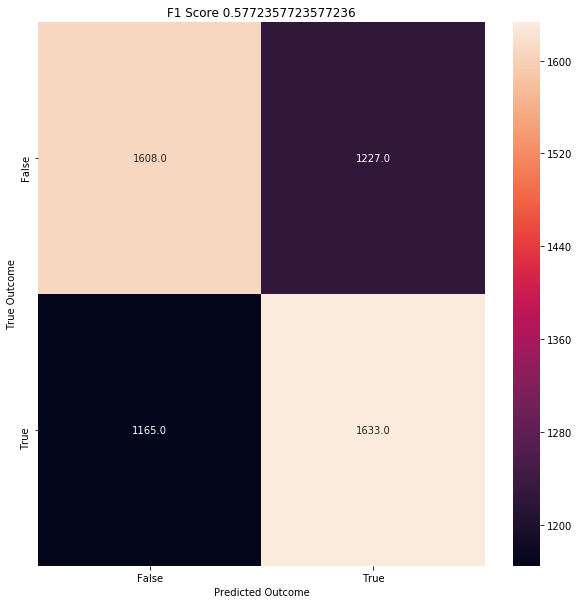

In [6]:
lr = LogisticRegression()
lr.fit(train_x, train_y)
print('Score of Logistic :', lr.score(test_x, test_y))
plotHeatmap(lr, test_x, test_y, keras=False)

## Deep NN

In [8]:
ipDim = train_x.shape[1]
model = Sequential()
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(550, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# plot_model(model, to_file='Model-DN1.svg', show_layer_names=True, show_shapes=True)

In [9]:
model.fit(train_x, train_y, epochs=300, batch_size=128)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/300
22529/22529 [==============================] - 5s 244us/step - loss: 0.6897 - acc: 0.5422
Epoch 2/300
22529/22529 [==============================] - 2s 110us/step - loss: 0.6757 - acc: 0.5674
Epoch 3/300
22529/22529 [==============================] - 2s 109us/step - loss: 0.6679 - acc: 0.5821
Epoch 4/300
22529/22529 [==============================] - 2s 110us/step - loss: 0.6623 - acc: 0.5943
Epoch 5/300
22529/22529 [==============================] - 2s 110us/step - loss: 0.6561 - acc: 0.6008
Epoch 6/300
22529/22529 [==============================] - 2s 109us/step - loss: 0.6520 - acc: 0.6063
Epoch 7/300
22529/22529 [==============================] - 2s 108us/step - loss: 0.6464 - acc: 0.6140
Epoch 8/300
22529/22529 [==============================] - 2s 108us/step 

22529/22529 [==============================] - 2s 108us/step - loss: 0.5426 - acc: 0.7163
Epoch 67/300
22529/22529 [==============================] - 2s 108us/step - loss: 0.5432 - acc: 0.7201
Epoch 68/300
22529/22529 [==============================] - 2s 108us/step - loss: 0.5416 - acc: 0.7166
Epoch 69/300
22529/22529 [==============================] - 2s 107us/step - loss: 0.5426 - acc: 0.7179
Epoch 70/300
22529/22529 [==============================] - 2s 108us/step - loss: 0.5422 - acc: 0.7197
Epoch 71/300
22529/22529 [==============================] - 2s 108us/step - loss: 0.5431 - acc: 0.7225
Epoch 72/300
22529/22529 [==============================] - 2s 108us/step - loss: 0.5416 - acc: 0.7220
Epoch 73/300
22529/22529 [==============================] - 2s 107us/step - loss: 0.5406 - acc: 0.7238
Epoch 74/300
22529/22529 [==============================] - 2s 108us/step - loss: 0.5395 - acc: 0.7197
Epoch 75/300
22529/22529 [==============================] - 2s 109us/step - loss: 0.53

22529/22529 [==============================] - 2s 109us/step - loss: 0.4885 - acc: 0.7631
Epoch 224/300
22529/22529 [==============================] - 2s 109us/step - loss: 0.4875 - acc: 0.7593
Epoch 225/300
22529/22529 [==============================] - 2s 108us/step - loss: 0.4870 - acc: 0.7655
Epoch 226/300
22529/22529 [==============================] - 2s 109us/step - loss: 0.4871 - acc: 0.7655
Epoch 227/300
22529/22529 [==============================] - 2s 110us/step - loss: 0.4887 - acc: 0.7622
Epoch 228/300
22529/22529 [==============================] - 2s 110us/step - loss: 0.4866 - acc: 0.7613
Epoch 229/300
22529/22529 [==============================] - 2s 109us/step - loss: 0.4872 - acc: 0.7635
Epoch 230/300
22529/22529 [==============================] - 2s 111us/step - loss: 0.4882 - acc: 0.7635
Epoch 231/300
22529/22529 [==============================] - 2s 107us/step - loss: 0.4853 - acc: 0.7625
Epoch 232/300
22529/22529 [==============================] - 2s 109us/step - l

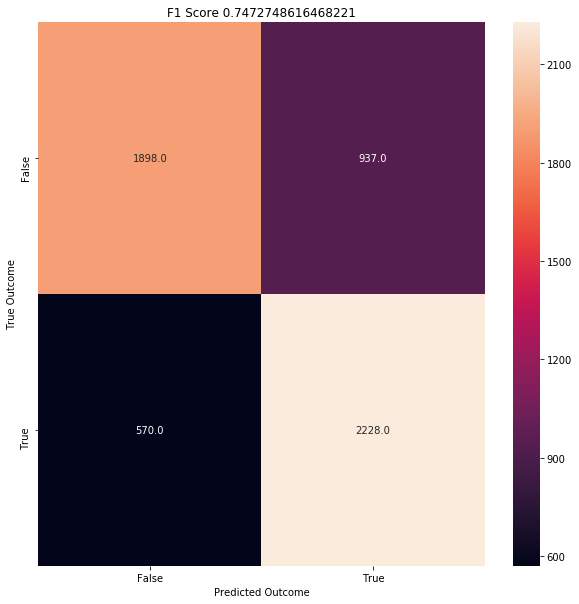

In [10]:
plotHeatmap(model, test_x, test_y)

In [11]:
model.save('DenseModel_v1.h5')

## Deep Conv NN

In [12]:
ndata, nfeature = X.shape
X_Conv = X.reshape(ndata, nfeature, 1)
input_shape = (nfeature, 1)
ctrain_x, ctest_x, ctrain_y, ctest_y = train_test_split(X_Conv, Y, train_size=0.8)

In [13]:
model = Sequential()

model.add(Conv1D(filters=30, kernel_size=2, input_shape=input_shape,kernel_initializer= 'uniform')) 
model.add(LeakyReLU(alpha=0.3))
model.add(Conv1D(filters=10, kernel_size=2, kernel_initializer= 'uniform')) 
model.add(LeakyReLU(alpha=0.3))

model.add(Flatten())
model.add(Dense(100))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.5))
model.add(Dense(25))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [14]:
plot_model(model, to_file='Model-CNN1.svg', show_layer_names=True, show_shapes=True)

In [15]:
model.fit(ctrain_x, train_y, epochs=4, batch_size=32)

Epoch 1/4
22529/22529 [==============================] - 10s 440us/step - loss: 0.6937 - acc: 0.4996
Epoch 2/4
22529/22529 [==============================] - 8s 374us/step - loss: 0.6940 - acc: 0.4981
Epoch 3/4
22529/22529 [==============================] - 19s 841us/step - loss: 0.6940 - acc: 0.4996
Epoch 4/4
22529/22529 [==============================] - 16s 728us/step - loss: 0.6938 - acc: 0.4984


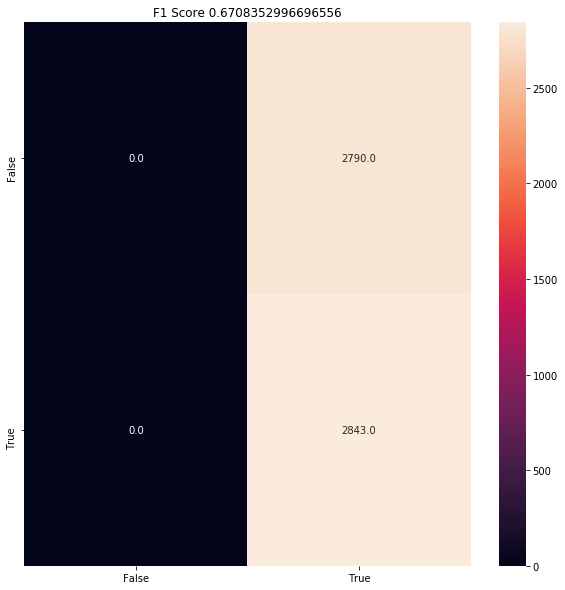

In [16]:
plotHeatmap(model, ctest_x, test_y)

## Deep Conv NN with seperate conv for target and drug

In [17]:
target = df.iloc[:, :30].values
drug = df.iloc[:, 30:-1].values
t_data, t_feature = target.shape
d_data, d_feature = drug.shape
t_input_shape = (t_feature, 1)
d_input_shape = (d_feature, 1)
train_idx, test_idx, dt_train_y, dt_test_y = train_test_split(np.arange(0, X.shape[0]), Y, train_size=0.8)
train_target = target[train_idx]
test_target = target[test_idx]
train_drug = drug[train_idx]
test_drug = drug[test_idx]

In [18]:
train_size = train_target.shape[0]
test_size = test_target.shape[0]

train_target = train_target.reshape(train_size, t_feature, 1)
test_target = test_target.reshape(test_size, t_feature, 1)
train_drug = train_drug.reshape(train_size, d_feature, 1)
test_drug = test_drug.reshape(test_size, d_feature, 1)

In [19]:
model1 = Sequential(layers=[
    # input layers and convolutional layers
    Conv1D(filters=30, kernel_size=2, input_shape=t_input_shape,kernel_initializer= 'uniform', activation= 'relu'),
    Conv1D(filters=10, kernel_size=2, kernel_initializer= 'uniform', activation= 'relu'),
    Dropout(.5),
    Flatten()
])

model2 = Sequential(layers=[
    # input layers and convolutional layers
    Conv1D(filters=15, kernel_size=2, input_shape=d_input_shape,kernel_initializer= 'uniform', activation= 'relu'),
    Conv1D(filters=10, kernel_size=2, kernel_initializer= 'uniform', activation= 'relu'),
    Dropout(.5),
    Flatten()

])

mergedOut = Concatenate()([model1.output,model2.output])
# mergedOut = Flatten()(mergedOut)    
mergedOut = Dense(256, activation='relu')(mergedOut)
mergedOut = Dropout(.5)(mergedOut)
mergedOut = Dense(128, activation='relu')(mergedOut)
mergedOut = Dropout(.35)(mergedOut)

# output layer
mergedOut = Dense(1, activation='sigmoid')(mergedOut)
newModel = Model([model1.input,model2.input], mergedOut)

newModel.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
plot_model(newModel, to_file='Model-CNN2.svg', show_layer_names=True, show_shapes=True)

In [21]:
newModel.fit([train_target, train_drug], dt_train_y,epochs=15, batch_size=32)   

Epoch 1/15
22529/22529 [==============================] - 28s 1ms/step - loss: 0.6932 - acc: 0.5057
Epoch 2/15
22529/22529 [==============================] - 26s 1ms/step - loss: 0.6917 - acc: 0.5246
Epoch 3/15
22529/22529 [==============================] - 26s 1ms/step - loss: 0.6897 - acc: 0.5344
Epoch 4/15
22529/22529 [==============================] - 26s 1ms/step - loss: 0.6887 - acc: 0.5437
Epoch 5/15
22529/22529 [==============================] - 26s 1ms/step - loss: 0.6890 - acc: 0.5345
Epoch 6/15
22529/22529 [==============================] - 28s 1ms/step - loss: 0.6880 - acc: 0.5424
Epoch 7/15
22529/22529 [==============================] - 26s 1ms/step - loss: 0.6868 - acc: 0.5441
Epoch 8/15
22529/22529 [==============================] - 27s 1ms/step - loss: 0.6872 - acc: 0.5442
Epoch 9/15
22529/22529 [==============================] - 27s 1ms/step - loss: 0.6848 - acc: 0.5507
Epoch 10/15
22529/22529 [==============================] - 28s 1ms/step - loss: 0.6850 - acc: 0.5488

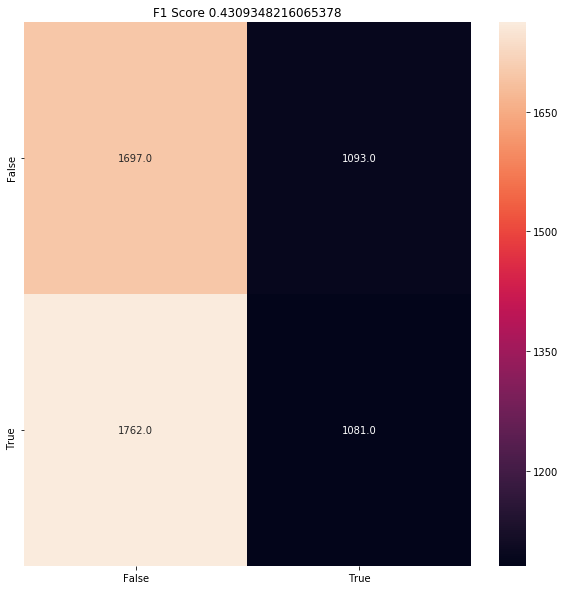

In [22]:
plotHeatmap(newModel, [test_target, test_drug], test_y)